<a href="https://colab.research.google.com/github/mveer1/google-colab-notebooks/blob/main/DSinPy/SortingAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Level 1. O(n^2)** <br> 
> * Bubble(stable)
> * Selection(unstable) (faster than bubble)
> * Insertion(stable, fastest here) <br>
> All three inplace here


**Level 2. O(nlogn)** <br> 

> * Merge (O(N)space, Stable) 
> * Quick (Worst case is O(n^2) less likely, faster than merge, O(logn) space), Usually not stable)
> * Heap (not stable but O(1), slower than other two)

**Level 3. Hybrid Algos**
> * Timsort, hybrid of merge and insertion, O(nlogn) time, O(n) space, stable
> * Introsort, hybrid of quick, heapsort and insertion sort, Worstcase O(nlogn), (not stable), space of O(logn)

# **Sort Efficiency**
for space:
### **In-Place or not**
1. Sorting Methods that are in-place (minimal storage sorting methods)
> no need of any extra storage 
2. Sorting Methods that are not in—place 
> Need extra storage to store intermediate results of the sorting <br>
> Extra storage is proportional to the size of data<br>
> ex. Merge Sort<br>


for time: <br>
Comparisons and Movements

## **Sort Stability**
> A stable algo will maintain a order of duplicate elements. <br>
> Stable sort is important when we arrange elements in two ways, like for ex. first with name then with grade. <br>

---

# **Selection Sort**
select the smallest in each pass and swap it with first place.
O(N^2) <br> <br>
Not data sensitive sort (time doesnt depend on quality of inputin terms of sorting) <br>
Less data movement<br>
**In-place sort**<br>
**Unstable** <br>
most of the times faster than bubble sort

---

# **Bubble Sort**
Adjacent elements are compared and swapped if they are not in order

first pass, adjacent elements are compared. til the end. and swapped if req.<br>
hence now the last element is sorted, <br>
now for second pass repeat but till second last element only <br>
total of n-1 passes are required. <br>
<br>

In [ ]:
def bubble_sort(a):
    for x in range(len(a)-1,0,-1):
        for j in range(x):
            if a[j]>a[j+1]:
                a[j], a[j+1] : a[j+1]la[j]

Now for an improvement, the array can be sorted in less than n-1 pass, so we can end it early, to do that, we'll see number of swaps made
if there are no swaps, end it.

In [ ]:
def bubble_sort(a):
    for x in range(len(a)-1,0,-1):
        swaps = 0
        for j in range(x):
            if a[j]>a[j+1]:
                a[j], a[j+1] : a[j+1]la[j]
                swaps+=1
        if swaps == 0:
            break 

Analysis:
>  Data Sensitive <br>
> avg and worst case - O(N^2) <br>
> best case - O(1) <br>
> Stable
> Inplace

---

# **Insertion Sort**
Insert elements one by one, finding the proper place for each. <br>
here, well consider two parts in the array, sorted and unsorted. <br>
1. take a[0]. name it as sorted part.
2. take first element of unsorted part, here a[1], insert it in sorted part.
3. this was 1st pass, repeat it till everything is sorted.

In [ ]:
def insertion_sort(a):
    for i in range(1,len(a)):         #n-1 iterations
        temp = a[i]
        j = i-1
        while j>=0 and a[j]>temp:
            a[j+1] = a[j]
            j=j-1
        a[j+1] = temp

Analysis:
1. outer loop has n-1 iterations, inner has 0 to i iterations
2. Data Sensitive <br>
3. Avg and worst case - O(N^2) <br>
3. Faster than bubble and selection in practise
4. Best case - O(n)<br>
5. Stable sort<br>
6. In-place<br>
7. Efficient when n is small<br>
8. many movements, (disadv)<br>
9. good for lists, already **almost** sorted<br>

---


# **Shell Sort**
(Improved insertion sort), aka Diminishing Increment Sort
1. We take a Increments list, say [5,3,1]
2. and a array of say 17 random numbers
3. now pass 1. make 5 sublists, 0,5,10,15 would be one list, 1,6,11,16 would be second and likewise
4. sort all of them with insertion sort
5. now pass 2. increment = 3, make 3 sublists, and sort using insertion sort.
6. in pass 3, make 1 sublist (take whole) and sort it. <br>
example: 

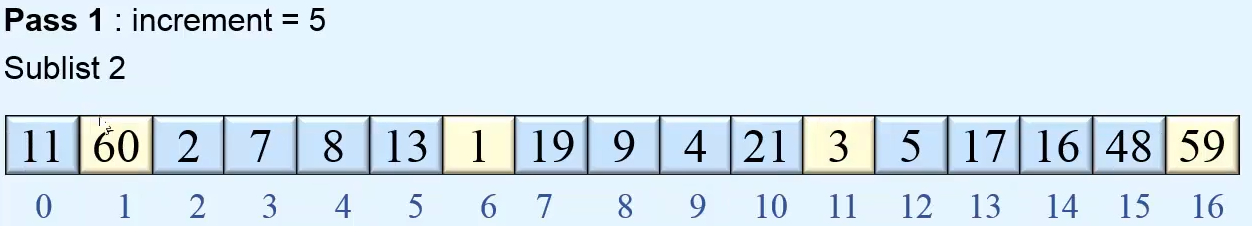

in each pass, its getting more and more sorted. 



In [ ]:
def shell_sort(a):
    h = int(input("Enter maximum increment(odd value) : "))
    while h>=1:
        for i in range(h,len(a)):
            temp = a[i]
            j=i-h
            while j >= 0 and a[j] > temp:
                a[j+h] = a[j]
                j=j-h
            a[j+h] = temp
        h=h-2

Analysis:
> O(n(logn)^2) to O(n^1.25) depending on increments <br>
> Unstable <br>
> Inplace space - O(1) <br>

Choice of Increments - <br>
should end with 1, and decrease in every pass. <br>
prefered increments - first increment = half the size of list and divde by two  for next <br>
if 17 elements, increments = [8,4,2,1] <br>

but another point to note is, increments shouldnt be multiples of each other, best if they are relatively prime. <br>

as given by knuth: increments[h] could be: <br>


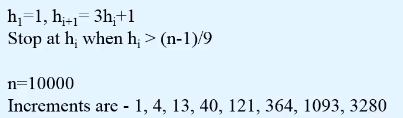

---

# **Merge Sort**
merging two sorted arrays is the key.



In [ ]:

def merge(a1,a2,temp):
    i = 0
    j = 0
    k = 0
    n1 = len(a1)
    n2 = len(a2)
    while i <= n1-1 and j <= n2-1:
        if a1[i] < a2[j]:
            temp[k] = a1[i]
            i+=1
        else:
            temp[k] = a2[j]
            j+=1
        k+=1
    # copy remaining elements of a1, list a2 finished
    while i <= n1-1:
        temp[k] = a1[i]
        i+=1
        k+=1
    # copy remaining elements of a2, list a1 finished
    while j <= n2-1:
        temp[k] = a2[j]
        j+=1
        k+=1

# n1, n2 are size of the two arrays
temp=[None]*(n1+n2)
merge(a1,a2,temp)

now merging sorted parts of an array into another array

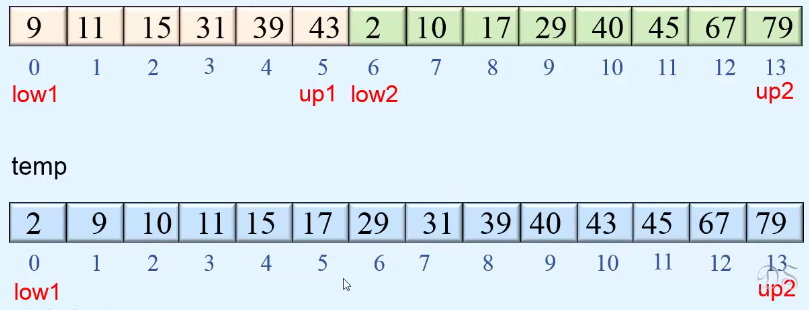

In [ ]:
def merge(a,temp, low1, up1, low2, up2):
    i = low1
    j = low2
    k = low1
    while i <= up1 and j <= up2:
        if a[i] < a[j]:
            temp[k] = a[i]
            i+=1
        else:
            temp[k] = a[j]
            j+=1
        k+=1
    # copy remaining elements of a1, list a2 finished
    while i <= up1:
        temp[k] = a[i]
        i+=1
        k+=1
    # copy remaining elements of a2, list a1 finished
    while j <= up2:
        temp[k] = a[j]
        j+=1
        k+=1



a = [1,2,4,6,   3,5,6,7,13,19]
temp  = [None]*len(a)
merge(a, temp, 0, 3, 4, 9)

### Merge Sort USing RECURSION (divide and conquer approach)


In [ ]:
def merge_sort(a):
    n=len(a)
    temp = [None]*n
    sort(a,temp,0,n-1)

def sort(a,temp,low,up):
    if low == up: # only one element
        return

    mid = (low + up)//2

    sort(a, temp, low, mid) # Sort a[low]....a[mid]
    sort(a, temp, mid+1, Up) # Sort a[mid+1]....a[up]

    # Merge a[low]...a[mid] and a[mid+1]....a[up] to temp[low]...temp[up]
    merge(a, temp, low, mid, mid+1, up)

    # Copy temp[low]...temp[up] to a[low]...a[up]
    copy(a, temp, low, up)

# a[low1]...a[up1] and a[low2]...a[up2] merged to temp[low1]...temp[up2]
def merge(a, temp, low1, up1, low2, up2):
    i = low1
    j = low2
    k = low1

    while i <= up1 and j <= up2:
        if a[i] <= a[j]:
            temp[k] = a[i]
            i+=1
        else:
            temp[k] = a[j]
            j+=1
        k+=1
        
        while i <= up1:
            temp[k] = a[i]
            i+=1
        k+=1
        while j <= up2:
            temp[k] = a[j]
            j+=1
        k+=1

# copies temp[low]....temp[up] to a[low]...a[up]
def copy(a, temp, low, up):
    for i in range(low,up+1):
        a[i] = temp[i]

Analysis:
1. n elements can be repeatedly divided into half approximately logn times
2. After halving the list logn times we get n sublists of size 1

3. In each pass, n elements are merged which is O(n)

4. Performance of merge sort is O(nlogn)
5. Stable sort 
6. Not an in-place sort, needs O(n) extra space

<br><br>
### Bottom UP Merge Sort (Iterative)
consider each element a sublist, and merge them, continue adding up.


In [ ]:
def mergelsort(a):
    n=len(a)
    temp = [None]*n
    size = 1
    while size <= n-1:
        sort_pass(a, temp, size, n)
        size = size * 2


def sort_pass(a,temp,size,n):
    low1 = 0
    while low1+size <= n-1:
        up1 = low1 + size - 1
        low2 = low1 + size
        up2 = low2 + size - 1
    
        if up2 >= n: # if length of last sublist is less than size
            up2 = n-1
    
        merge(a, temp, low1, up1, low2, up2)

        low1 = up2 + 1 # Take next two sublists for merging
    
    for i in range(low1,n):
        temp[i] = a[i] # If any sublist is left alone
    
    copy(a, temp, n)

# a[low1]...a[up1] and a[low2]...a{up2] merged to temp[low1]...temp[up2] */
def merge(a, temp, low1, up1, low2, up2):
    i = low1
    j = low2 
    k = low1
    while i <= up1 and j <= up2:
        if a[i] <= a[j]:
            temp[k] = a[i]
            i+=1
        else:
            temp[k] = a[j]
            j+=1
        k+=1

    while i <= up1:
        temp[k] = a[i]
        i+=1
        k+=1
    while j <= up2:
        temp[k] = a[j]
        j+=1
        k+=1

# copies temp[low]....temp[up] to a[low]...a[up]
def copy(a, temp, n):
    for i in range(n):
        a[i] = temp[i]

---

# **Quick SORT**
aka Partition-Exchange Sort <br>
1959 (same as shell) <br>
base on divide and conquer <br>

<!-- 1. We take an element, place it at proper position in the list and hence rearrange the list if needed so that all the element to the right are higher and to the left are lower, also call the element pivot.
2. then chose another pivot1 exactly between pivot and start, and pivot2 between end and pivot. 
3. continue recursively.  -->

1. take the first element of list as pivot
2. rearrange the list...pivot is placed at index p  (by partition process)
3. new two sublists will be, 1. low to p-1, 2. p+1 to end/up
4. continue recursively
<br><br>

partition process- 
> move i from low, (considering first element is pivot, low is 2nd element)<br>
> stop only when a[i] > pivot <br>
> move j from up (end) <br>
> stop only when a[i] < pivot<br>
> when both stops and i<j, swap them. and continue this till i<j<br>
> when i=j, swap pivot with j (one less than when they were equal.

In [ ]:
def quick_sort(a):
    sort(a,0,len(a)-1)

def sort(a, low, up):
    if low >= up: # zero or one element in sublist
        return
    p = partition(a,low,up)
    sort(a,low,p-1) # Sort left sublist
    sort(a,p+1,up) # Sort right sublist

def partition(a, low, up):
    pivot = a[low]
    i = low+1 # moves from left to right
    j = up # moves from right to left
    l
    while i <= j:
    
        while a[i] < pivot and i < up:
            i+=1
        while a[j] > pivot:
            j-=1
     
        if i < j: # swap a[i] and a[j]
            temp = a[i]
            a[i] = a[j]
            a[j] = temp
            i+=1
            j-=1
        else: # found proper place for pivot
            break
    
    # Proper place for pivot is j
    a[low] = a[j]
    a[j] = pivot

    return j

Analysis:
1. Data Sensitive <br>
2. Partition is balanced (index for pivot is in the middle) then its best. 
3. Best case - O(nlogn)<br>
4. Worst case - O(n^2)
5. UNStable sort<br>
6. not In-place  O(logn)<br>

---

# **Binary Tree Sort**
Construction Phase and Traversal (inorder) phase <br>
inorde because it gives the data in ascending order  <br>
For contruction: 
1. Insert one by one,to form a binary search tree
2. the inorder traversal of that tree is our answer <br>

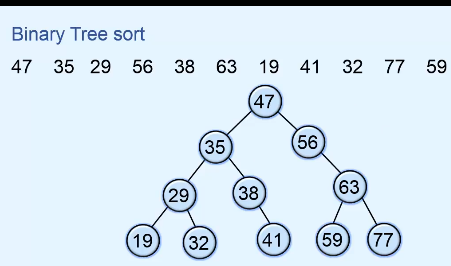


In [ ]:
class Node:
    def __init__(self,value):
        self.info = value
        self.lchild = None
        self.rchild = None

class BinarySearchTree:

    def __init__(self):
        self.root = None

    def is_empty(self):
        return self.root == None

    def insert(self,x):
        self.root = self._insert(self.root, x)

    def _insert(self,p, x):
        if p is None:
            p = Node(x)
        elif x < p.info :
            p.lchild = self._insert(p.lchild, x)
        else:
            p.rchild = self._insert(p.rchild, x)
        return p

    def inorder(self):
        self._inorder(self.root)
        print()

    def _inorder(self, p):
        if p is None :
            return
        self._inorder(p.lchild)
        print(p.info, " ")
        self._inorder(p.rchild)




Analysis:
2. Data Sensitive <br>
3. Avg and worst case - O(n^2) <br>
4. Best case - O(nlogn)<br> (not that the best case considered here is that tree is balanced. and hence less height 
5. Stable sort<br>
6. Not In-place<br>
7. We can use Threaded BST

---

# **Heap Sort**
1. Convert the array to a max heap
2. delete one by one, till there is only one element left.
3. but the element deleted is stored in a[n]  (Last element of the array)
4. the new array(representing the heap) is till n-1
5. continue.
6. restore down where ever is req. 

In [ ]:
def heap_sort(a, n):
    build_heap_bottom_up(a, n)
    
    while n > 1:
        maxValue = a[1]
        a[1] = a[n]
        a[n] = maxValue
        n=n-1
        retsore_down(1, a, n)

def build_heap_bottom_up(a, n):
    i=n//2
    while i>=1:
        retsore_down(i, a, n)
        i=i-1
    
def retsore_down(i, a, n):
    k = a[i]
    lchild = 2 * i
    rchild = lchild + 1

    while rchild <= n:
        if k >= a[lchild] and k >= a[rchild]:
            a[i] = k
            return
        elif a[lchild] > a[rchild]:
            a[i] = a[lchild]
            i = lchild
        else:
            a[i] = a[rchild]
            i = rchild

        lchild = 2 * i
        rchild = lchild + 1
 
    #if number of nodes is even
    if lchild == n and k <a[lchild]:
        a[i] = a[lchild]
        i = lchild
    a[i] = k

Analysis:
1. building a heap - O(n)
2. now all the deleting takes O(nlogn)
3. therefore, O(nlogn) is the worst,avg,best case complexities
4. NOt a Stable sort
5. IN PLACE, space - O(1)


---
# **Radix Sort**
digit by digit<br>
Least significant digit -> Most significant digit<br>
Pass1 :<br>
Elements are sorted according to their units (least significant) digits<br>
Pass 2:<br>
Elements are sorted according to their tens digit1<br>
Pass 3:<br>
Elements are sorted according to hundreds digit1<br>
Lastpass:<br>
Elements are sorted according to their most significant digits<br>

number of passes, determines by largest one. <br>
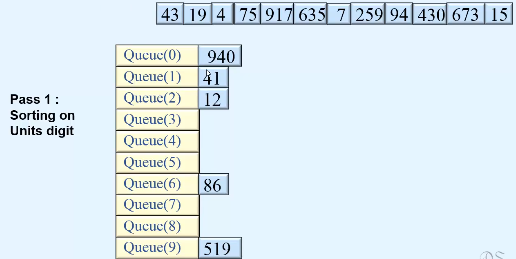

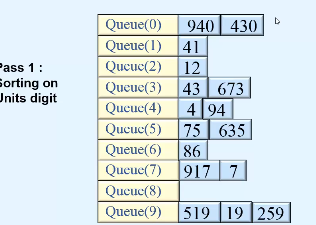

now combine them, to see units digits are good sorted: <br>
image.png

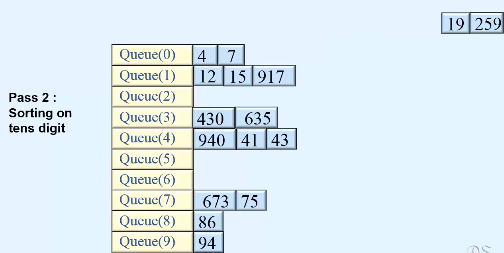

continue for 3rd pass. <br>

Implementation of Radix sort
1. Input data is taken in  linked list
2. queues will be linked list too. 
3. Linked Allocation
> In each pass:
>> Insert nodes into different queues : Rearrange links 
>> Combine queues back to list : Rearrange links 


In [ ]:
class Node:
    def __init__(self,value):
        self.info = value
        self.link = None

def radix_sort(start):

    rear = [None] * 10
    front = [None] * 10

    leastSigPos = 1
    mostSigPos = DigitsInLargest(start)

    for k in range(leastSigPos, mostSigPos+1):
        #Making all the queues empty at the beginning of each pass
        for i in range(10):
            rear[i] = None
            front[i] = None

        p = start
        while p is not None:
            #Find kth digit from right in the number
            dig = Digit(p.info, k)
            #Insert the node in Queue(dig)
            if front[dig] is None:
                front[dig] = p
            else:
                rear[dig].link = p
            rear[dig] = p

            p=p.link

        #Join all queues to form new linked list
        i = 0 
        while front[i] is None: #Finding first non empty queue
            i=i+1
        
        start = front[i]
        while i <= 8:
            if rear[i+1] is not None: #if (i+1)th queue is not empty
                rear[i].link = front[i+1] #join end of ith queue to start of (i+1)th queue
            else:
                rear[i+1] = rear[i] #continue with rear[i]
            i=i+1
        rear[9].link = None
    return start

#Returns number of digits in the largest element of the list
def DigitsInLargest(start):
    #Find largest element
    large = O
    p = start
    while p is not None:
        if p.info > large:
            large = p.info
        p = p.link 
    
    #Find number of digits in largest element
    ndigits = 0
    while large != 0:
        ndigits = ndigits+1
        large//=10
    return ndigits

#Returns kth digit from right in n
def Digit(n, k):
    d = O
    for i in range(1,k+1):
        d = n%10
        n//=10
    return d












# start = None

# n = int(input("Enter the number of elements : ")) I

# for i in range(n): #Inserting elements in linked list
#     data = int(input("Enter element : "))
    
#     temp = Node(data)
#     if start is None:
#         start = temp
#     else:
#         p = start
#         while p.link is not None:
#             p = p.link
#         p.link = temp

# start = radix_sort(start)
# print("Sorted list is : ")
# p = start
# while p is not None :
#     print(p.info , " ")
# p = p.link
# print()

Analysis: <br>
time - O(p*n), p is the number of digits in the largest element<br>
not an in place sort <br>
stable sort.<br>